In [2]:
import pandas as pd

digits_training_data = pd.read_csv('./train.csv')

# X is all the features I will be training the dataset on 
X = digits_training_data.copy()
# y is the prediction target
# pop label from the X and at the same time set the target
y = X.pop('label')

X.head()
# y.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.model_selection import train_test_split

# use part of the data from training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

In [4]:
from tensorflow.keras.utils import to_categorical

picture_height, picture_width = 28, 28
number_type_count = 10

def reshape_digits_data(data):
    number_of_images = data.shape[0]
    shaped_data = data.values.reshape(number_of_images, picture_height, picture_width, 1) # 1 is grayscale
    return shaped_data

# to categorical pavercia reiksmes i vektoriu, jis reikalinas categorical_crossentropy.
def transform_digits_labels(labels):
    return to_categorical(labels, number_type_count)


In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# use part of the data from training and validation
X_train, X_valid, y_train, y_valid = train_test_split(X, y, stratify=y, train_size=0.75)

#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = reshape_digits_data(X_train)
y_train = transform_digits_labels(y_train)

X_valid = reshape_digits_data(X_valid)
y_valid = transform_digits_labels(y_valid)

In [7]:
from tensorflow import keras
from tensorflow.keras import layers

# max pooling surenka isryskina reiksmes
# convolution tai eina filtras ir grupuoja duomenis (+-, nevisai cia tikslu)
model = keras.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Convolution2D(32,(3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Convolution2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(10, activation='softmax'),
])

In [8]:
# min_delta is the minimum change in the monitored quantity to qualify as an improvement, which is used for early stopping.
# patience is the number of epochs with no improvement after which training will be stopped.

early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)

optimizer = keras.optimizers.Adam(lr=0.0001)
# optimizer is the algorithm used to update the weights of the model.
# loss is the loss function to be minimized by the model.
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# batch size is the number of samples (rows) that will be processed at a time
# epochs is the number of times the entire dataset will be processed
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
)

C:\Users\laimo\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/1000
493/493 [==============================] - 10s 3ms/step - loss: 0.7656 - accuracy: 0.8166 - val_loss: 0.2854 - val_accuracy: 0.9172
Epoch 2/1000
493/493 [==============================] - 1s 3ms/step - loss: 0.2186 - accuracy: 0.9371 - val_loss: 0.1814 - val_accuracy: 0.9487
Epoch 3/1000
493/493 [==============================] - 1s 3ms/step - loss: 0.1525 - accuracy: 0.9551 - val_loss: 0.1359 - val_accuracy: 0.9612
Epoch 4/1000
493/493 [==============================] - 1s 3ms/step - loss: 0.1185 - accuracy: 0.9665 - val_loss: 0.1121 - val_accuracy: 0.9674
Epoch 5/1000
493/493 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.9716 - val_loss: 0.0977 - val_accuracy: 0.9698
Epoch 6/1000
493/493 [==============================] - 1s 2ms/step - loss: 0.0850 - accuracy: 0.9748 - val_loss: 0.0918 - val_accuracy: 0.9730
Epoch 7/1000
493/493 [==============================] - 1s 2ms/step - loss: 0.0750 - accuracy: 0.9773 - val_loss: 0.0770 - val_accuracy

Minimum Validation Loss: 0.0526


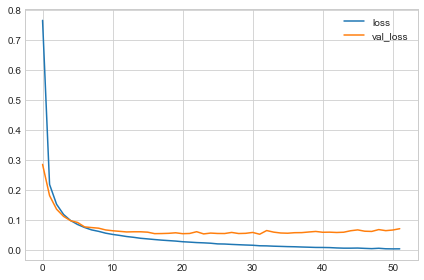

In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [11]:
digits_training_data = pd.read_csv('./test.csv')
test_X = reshape_digits_data(digits_training_data.copy())

prediction = model.predict_classes(test_X)

submissions=pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)),
                         "Label": prediction})
submissions.to_csv("CNN1.csv", index=False, header=True)

rezultatas: 0.98378